# MovieLens 10M

Detection results using different classifiers

### Parameters

* d = 30% 
* θ = 0.75
* N = 6
* J = 40

In [1]:
import sys
import os
from copy import deepcopy

import pandas as pd
import numpy as np

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# Changing paths to src and importing co-forest
src_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(src_path)
from models.classifiers.CoForestClassifier import CoForest

In [30]:
rd = np.random.RandomState(5)
J = 40

attributes_names = ["a{}".format(i) for i in range(1, 2*J + 1)]
attributes_names.append("tag")

In [31]:
df_train = pd.read_csv(filepath_or_buffer="./results/tr/train-all.csv", names=attributes_names)
X= df_train[df_train.columns[:-1]].values
y = df_train.tag.values.astype(int)

L_train, U_train, Ly_train, Uy_train = train_test_split(X, y, test_size=0.7, random_state=rd, stratify=y)

# Random Forest
random_forest_all = RandomForestClassifier(6, max_features='log2', random_state=rd)
random_forest_all.fit(X, y)

# Random Forest - d (30%)
random_forest_d = RandomForestClassifier(6, max_features='log2', random_state=rd)
random_forest_d.fit(L_train, Ly_train)

# Co Forest
co_forest = CoForest(L_train, Ly_train, U_train, 6, 0.75, random_state=rd, max_features='log2')
co_forest.fit()

In [5]:
cls = [random_forest_all, random_forest_d, co_forest]
cls_names= ["RF-A", "RF-L", "SADR-CoF"]

attack_size = [10, 20, 50, 100]
attack_size_tags = ['1%', '20%', '50%', '10%']

filler_size = [0.01, 0.03, 0.05, 0.1]
filler_size_tags = ['1%', '3%', '5%', '10%']

In [11]:
def get_comparation_graph(attack):

    fig, axes = plt.subplots(3, 4, figsize=(12, 6), tight_layout=True)

    for j in range(4): # J = filler size

        recalls = {cls_name: [] for cls_name in cls_names} 
        precisions = {cls_name: [] for cls_name in cls_names} 

        for e in range(1, 11): # e = nº experimentos (10 veces)

            df_genuine_test = pd.read_csv(filepath_or_buffer="./results/t-{}/test-{}-genuine.csv".format(e, e), names=attributes_names)
            recalls_experiment = {cls_name: [] for cls_name in cls_names} 
            precisions_experiment = {cls_name: [] for cls_name in cls_names} 

            for k in range(4):  # K = attack size

                target = pd.read_csv(filepath_or_buffer="./results/t-{}/test-{}-{}-{}-{}.csv".format(e, e, attack, filler_size[j], attack_size[k]), names=attributes_names)
                vertical_stack = pd.concat([deepcopy(df_genuine_test), target], axis=0)
                X_test = vertical_stack[vertical_stack.columns[:-1]].values
                y_test  = vertical_stack.tag.values.astype(int)

                for cl, cls_name in zip(cls, cls_names):
                    y_pred = cl.predict(X_test)
                    recalls_experiment[cls_name].append(recall_score(y_test, y_pred))
                    precisions_experiment[cls_name].append(precision_score(y_test, y_pred))

            for cls_name in cls_names:
                recalls[cls_name].append(recalls_experiment[cls_name])
                precisions[cls_name].append(precisions_experiment[cls_name])


        axes[0][j].set_xlabel('Attack Size \n Filler size = {}'.format(filler_size_tags[j]))
        axes[0][j].set_ylabel('Recall')
        axes[0][j].set_ylim(0, 1.1)

        axes[1][j].set_xlabel('Attack Size \n Filler size = {}'.format(filler_size_tags[j]))
        axes[1][j].set_ylabel('Precision')
        axes[1][j].set_ylim(0, 1.1)

        axes[2][j].set_xlabel('Attack Size \n Filler size = {}'.format(filler_size_tags[j]))
        axes[2][j].set_ylabel('AUC')
        axes[2][j].set_ylim(0, 1.1)

        for cls_name, style in zip (cls_names, ['->m', '-.^c', ':*k']):
            axes[0][j].plot(attack_size_tags, np.mean(np.array(recalls[cls_name]), axis=0), style, linewidth=0.8, label=cls_name)
            axes[1][j].plot(attack_size_tags, np.mean(np.array(precisions[cls_name]), axis=0), style, linewidth=0.8, label=cls_name)

    plt.plot()

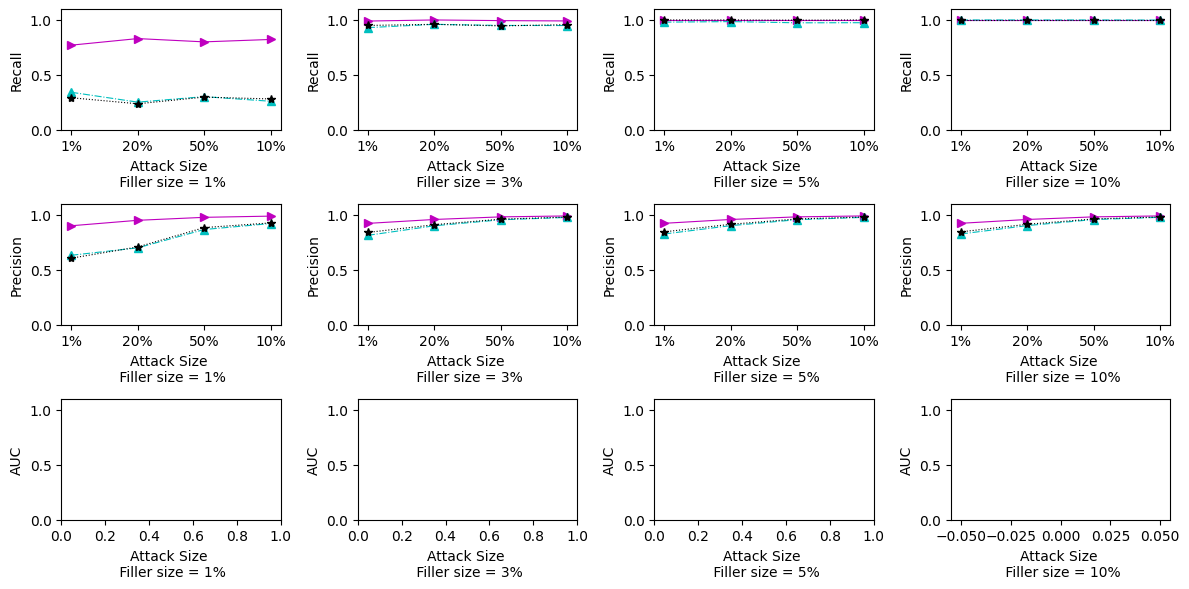

In [7]:
get_comparation_graph('random')

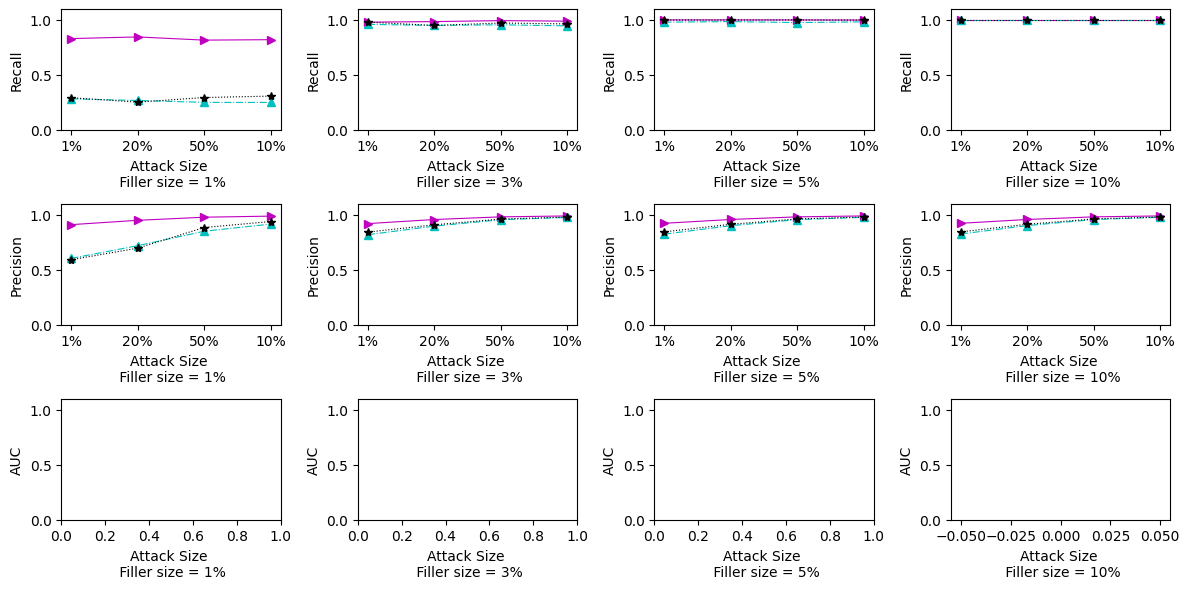

In [8]:
get_comparation_graph('average')

1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1020
1050
1050


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1050
1100
1100


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1100
1010
1010


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1010
1020
1020


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1020
1050
1050


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1050
1100
1100


c:\Users\patri\source\venvs\tfg-01\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050
1050
1050
1100
1100
1100
1010
1010
1010
1020
1020
1020
1050


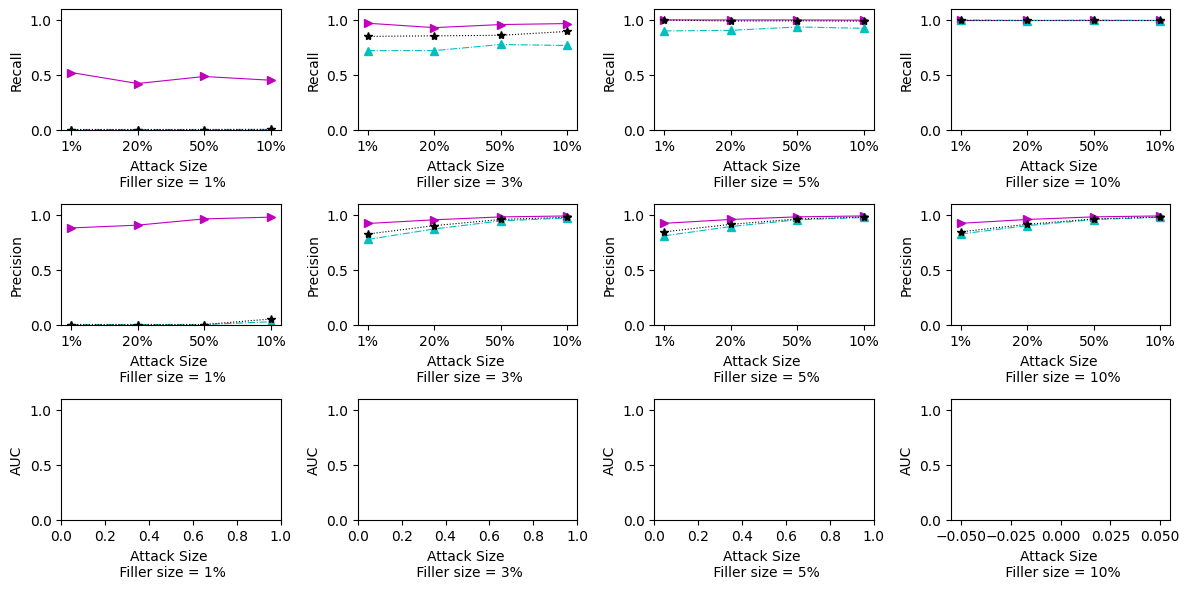

In [12]:
get_comparation_graph('bandwagon')